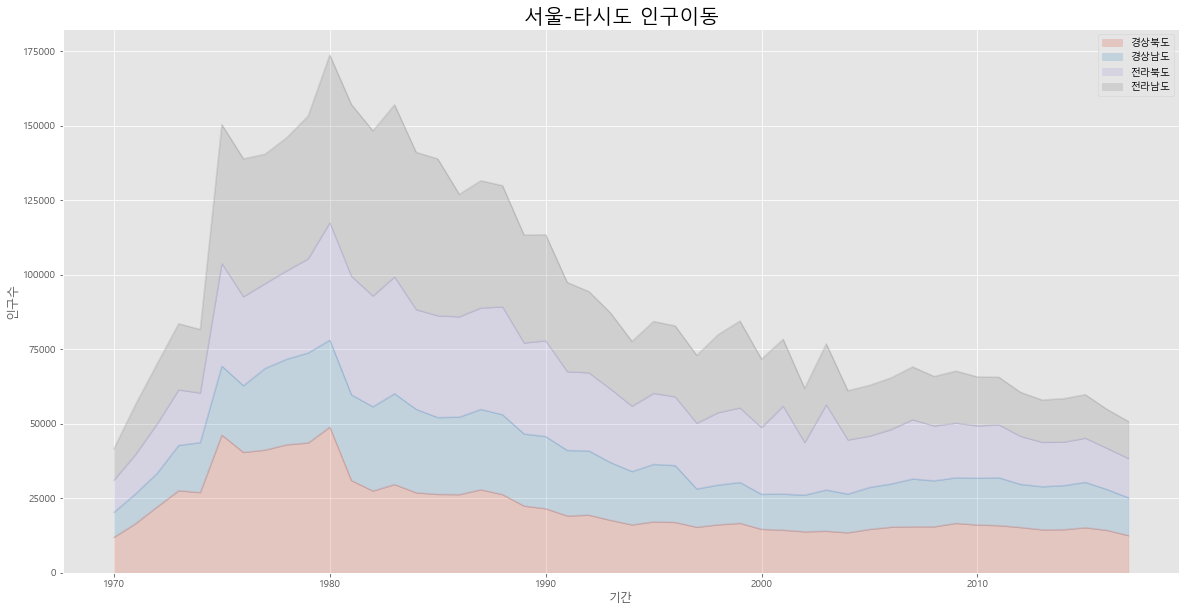

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 

font_path = "C:\\Windows\\Fonts\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

df = pd.read_excel("File\\시도별 전출입 인구수.xlsx", engine="openpyxl", header=0)
df = df.fillna(method="ffill")
mask = (df["전출지별"] == "서울특별시")&(df["전입지별"]!="서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop("전출지별", axis=1)
df_seoul.rename({"전입지별":"전입지"}, axis=1, inplace=True)
df_seoul.set_index(["전입지"], inplace=True)

col_year = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[["경상북도", "경상남도", "전라북도", "전라남도"], col_year]
df_4 = df_4.transpose()

plt.style.use("ggplot")
df_4.index = df_4.index.map(int)
df_4.plot(kind="area", stacked=True, alpha=0.2, figsize=(20,10))
plt.title("서울-타시도 인구이동", size=20)
plt.xlabel("기간")
plt.ylabel("인구수")
plt.legend(loc="best", fontsize=10)
plt.show()

C:\Users\lio22\AppData\Local\Temp\ipykernel_3480\1781241705.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop("전출지별", axis=1, inplace=True)


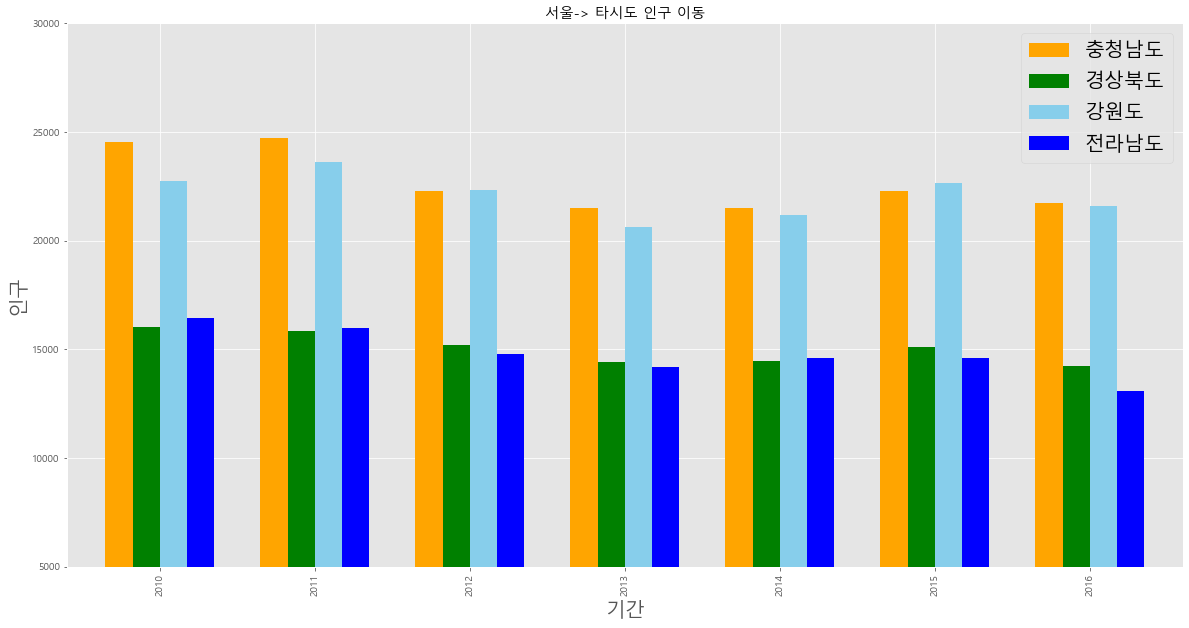

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 

font_path = "C:\\Windows\\Fonts\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

df = pd.read_excel("File\\시도별 전출입 인구수.xlsx", engine="openpyxl", header=0)
df = df.fillna(method="ffill")
mask = (df["전출지별"]=="서울특별시")&(df["전입지별"]!="서울특별시")
df_seoul = df[mask]
df_seoul.drop("전출지별", axis=1, inplace=True)
df_seoul = df_seoul.rename({"전입지별":"전입지"}, axis=1)
df_seoul.set_index("전입지", inplace=True)

col_year = list(map(str, range(2010, 2017)))
df_4 = df_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_year]
df_4 = df_4.T

plt.style.use("ggplot")

df_4.index= df_4.index.map(int)

df_4.plot(kind='bar', figsize=(20,10), width=0.7, color=["orange", "green", "skyblue", "blue"])
plt.title("서울-> 타시도 인구 이동")
plt.ylabel("인구", size=20)
plt.xlabel("기간", size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=20)
plt.show()

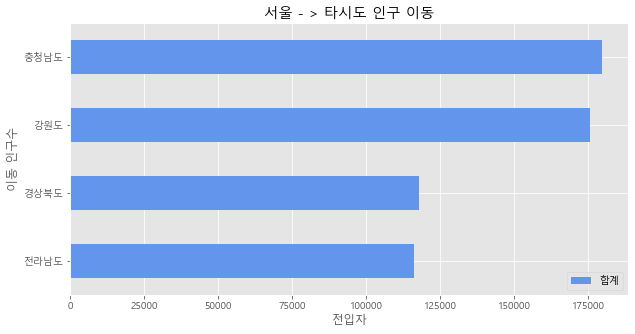

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc 

font_path = "C:\\Windows\\Fonts\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df= pd.read_excel("File\\시도별 전출입 인구수.xlsx", engine="openpyxl", header=0)
df = df.fillna(method="ffill")
mask = (df["전출지별"]=="서울특별시") & (df["전입지별"]!="서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop("전출지별", axis=1)
df_seoul.rename({"전입지별":"전입지"}, axis=1, inplace=True)
df_seoul.set_index("전입지", inplace=True)

col_year = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[["충청남도", "경상북도", "강원도", "전라남도"], col_year]
df_4["합계"] = df_4.sum(axis=1)
df_total = df_4[["합계"]].sort_values(by="합계", ascending=True)

plt.style.use("ggplot")
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))
plt.title("서울 - > 타시도 인구 이동")
plt.xlabel("전입자")
plt.ylabel("이동 인구수")
plt.show()